In this program, I use Grover's Search Algorithm to create a circuit that has a high probability of outputting the desired string of length n composed of 0s and 1s that is entered by the user.

The unique part of my circuit is the implimentation of a z gate with n-1 controls that is composed of only rz gates, cx gates, and swaps. This is used in both the oracle and the diffuser.

In [1]:
# Import the necessary packages
from qiskit import QuantumCircuit, Aer, assemble, transpile
from numpy import pi
from qiskit.visualization import plot_histogram

In [2]:
# Enter the desired string (Ex: '10101')

bit = '01101'

In [3]:
# Define the functions that create the z gate with n-1 controls

def cs(circuit: QuantumCircuit, target: int, ):
    circuit.cx(target+1,target)
    circuit.swap(target+1,target)

def x(circuit: QuantumCircuit, bits: int):
    cs(circuit, 0)
    circuit.rz(2 * pi / (2**bits),0)
    cs(circuit, 0)
    circuit.rz(2 * pi / (2**bits),0)
    cs(circuit, 0)

def mqcz(circuit: QuantumCircuit, bits: int):
    qc.rz(2 * pi / (2**n),0)
    if n == 1:
        pass
    if n == 2:
        x(circuit, bits)
    else:
        x(circuit, bits)
        loop(circuit, bits)
    
def loop(circuit: QuantumCircuit, bits: int):
    i = 3
    while(i<=bits):
        recursive(circuit, bits, i)
        i = i + 1

def recursive(circuit: QuantumCircuit, bits, i: int):
    if(i==3):  
        cs(circuit, 1)
        x(circuit, bits)
        cs(circuit, 1)
        x(circuit, bits)
        cs(circuit, 1)
    else:
        cs(circuit, i-2)
        recursive(circuit, bits, i-1)
        cs(circuit, i-2)
        recursive(circuit, bits, i-1)
        cs(circuit, i-2)

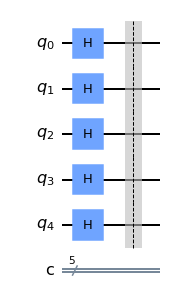

In [4]:
# Create the circuit and randomize the input using a Hadamard gate on each qubit

# Get the length of the entered string
n = len(bit)

# Declare the quantum circuit
qc = QuantumCircuit(n,n)

# H gate at each qubit to randomize the input into the Oracle
qc.h(range(0,n))

# Barrier
qc.barrier(range(0,n))

# Display the circuit
display(qc.draw())

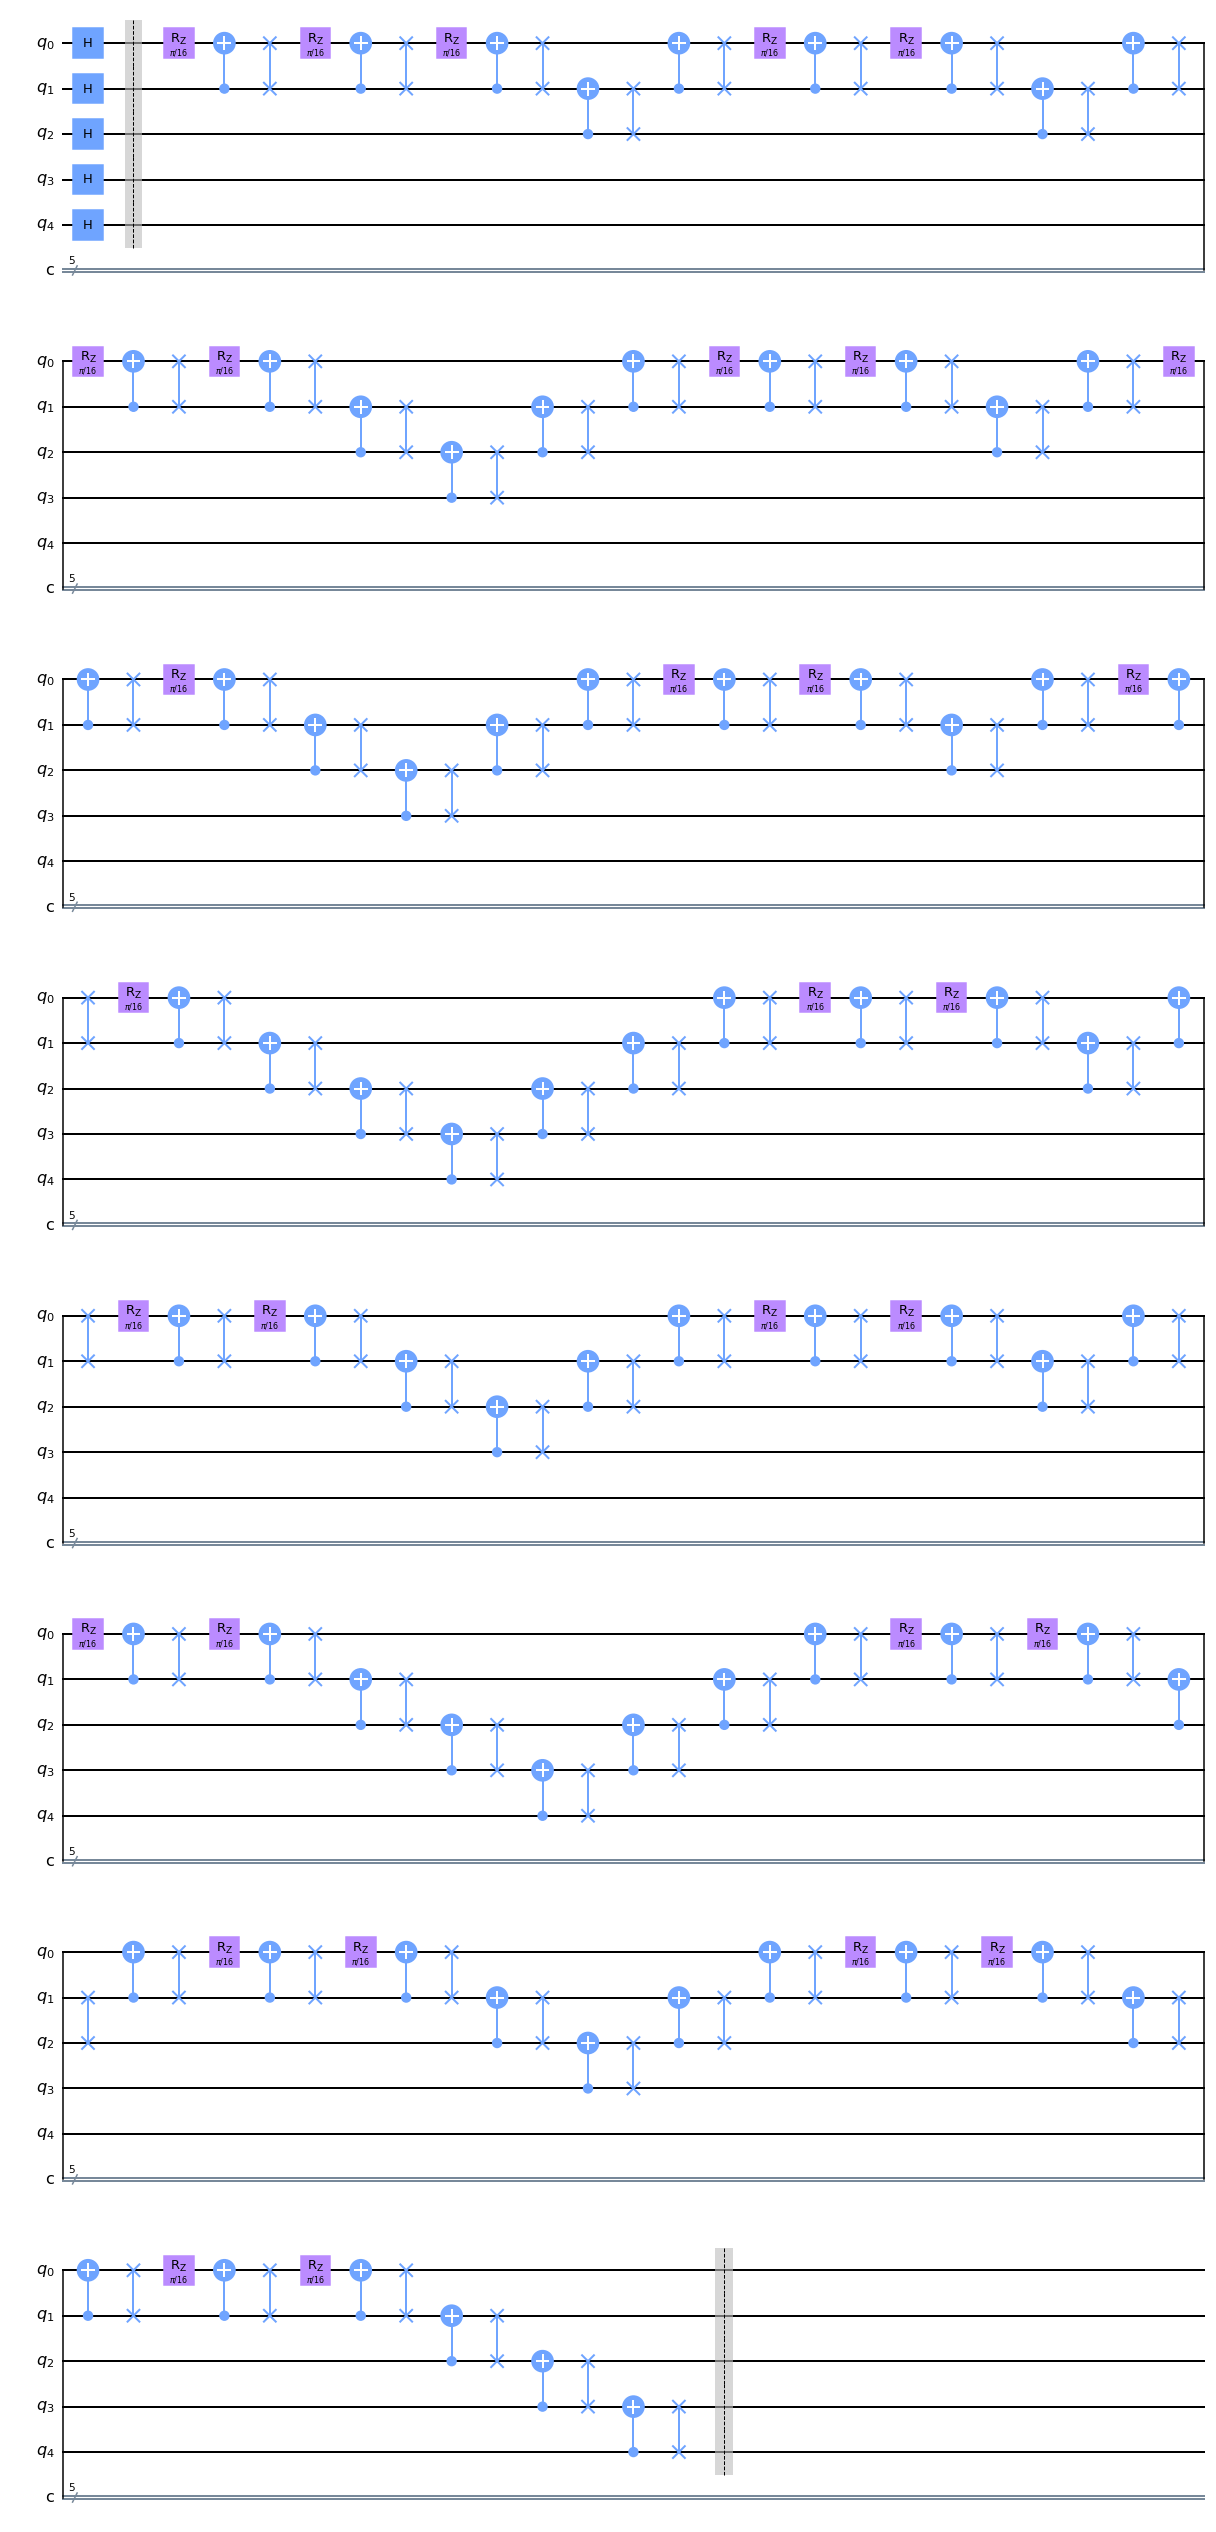

In [5]:
# Implement the Oracle (z gate with n-1 controls)

# Z gate with n-1 controls
mqcz(qc,n)

# Barrier
qc.barrier(range(0,n))

# Display the circuit
display(qc.draw())

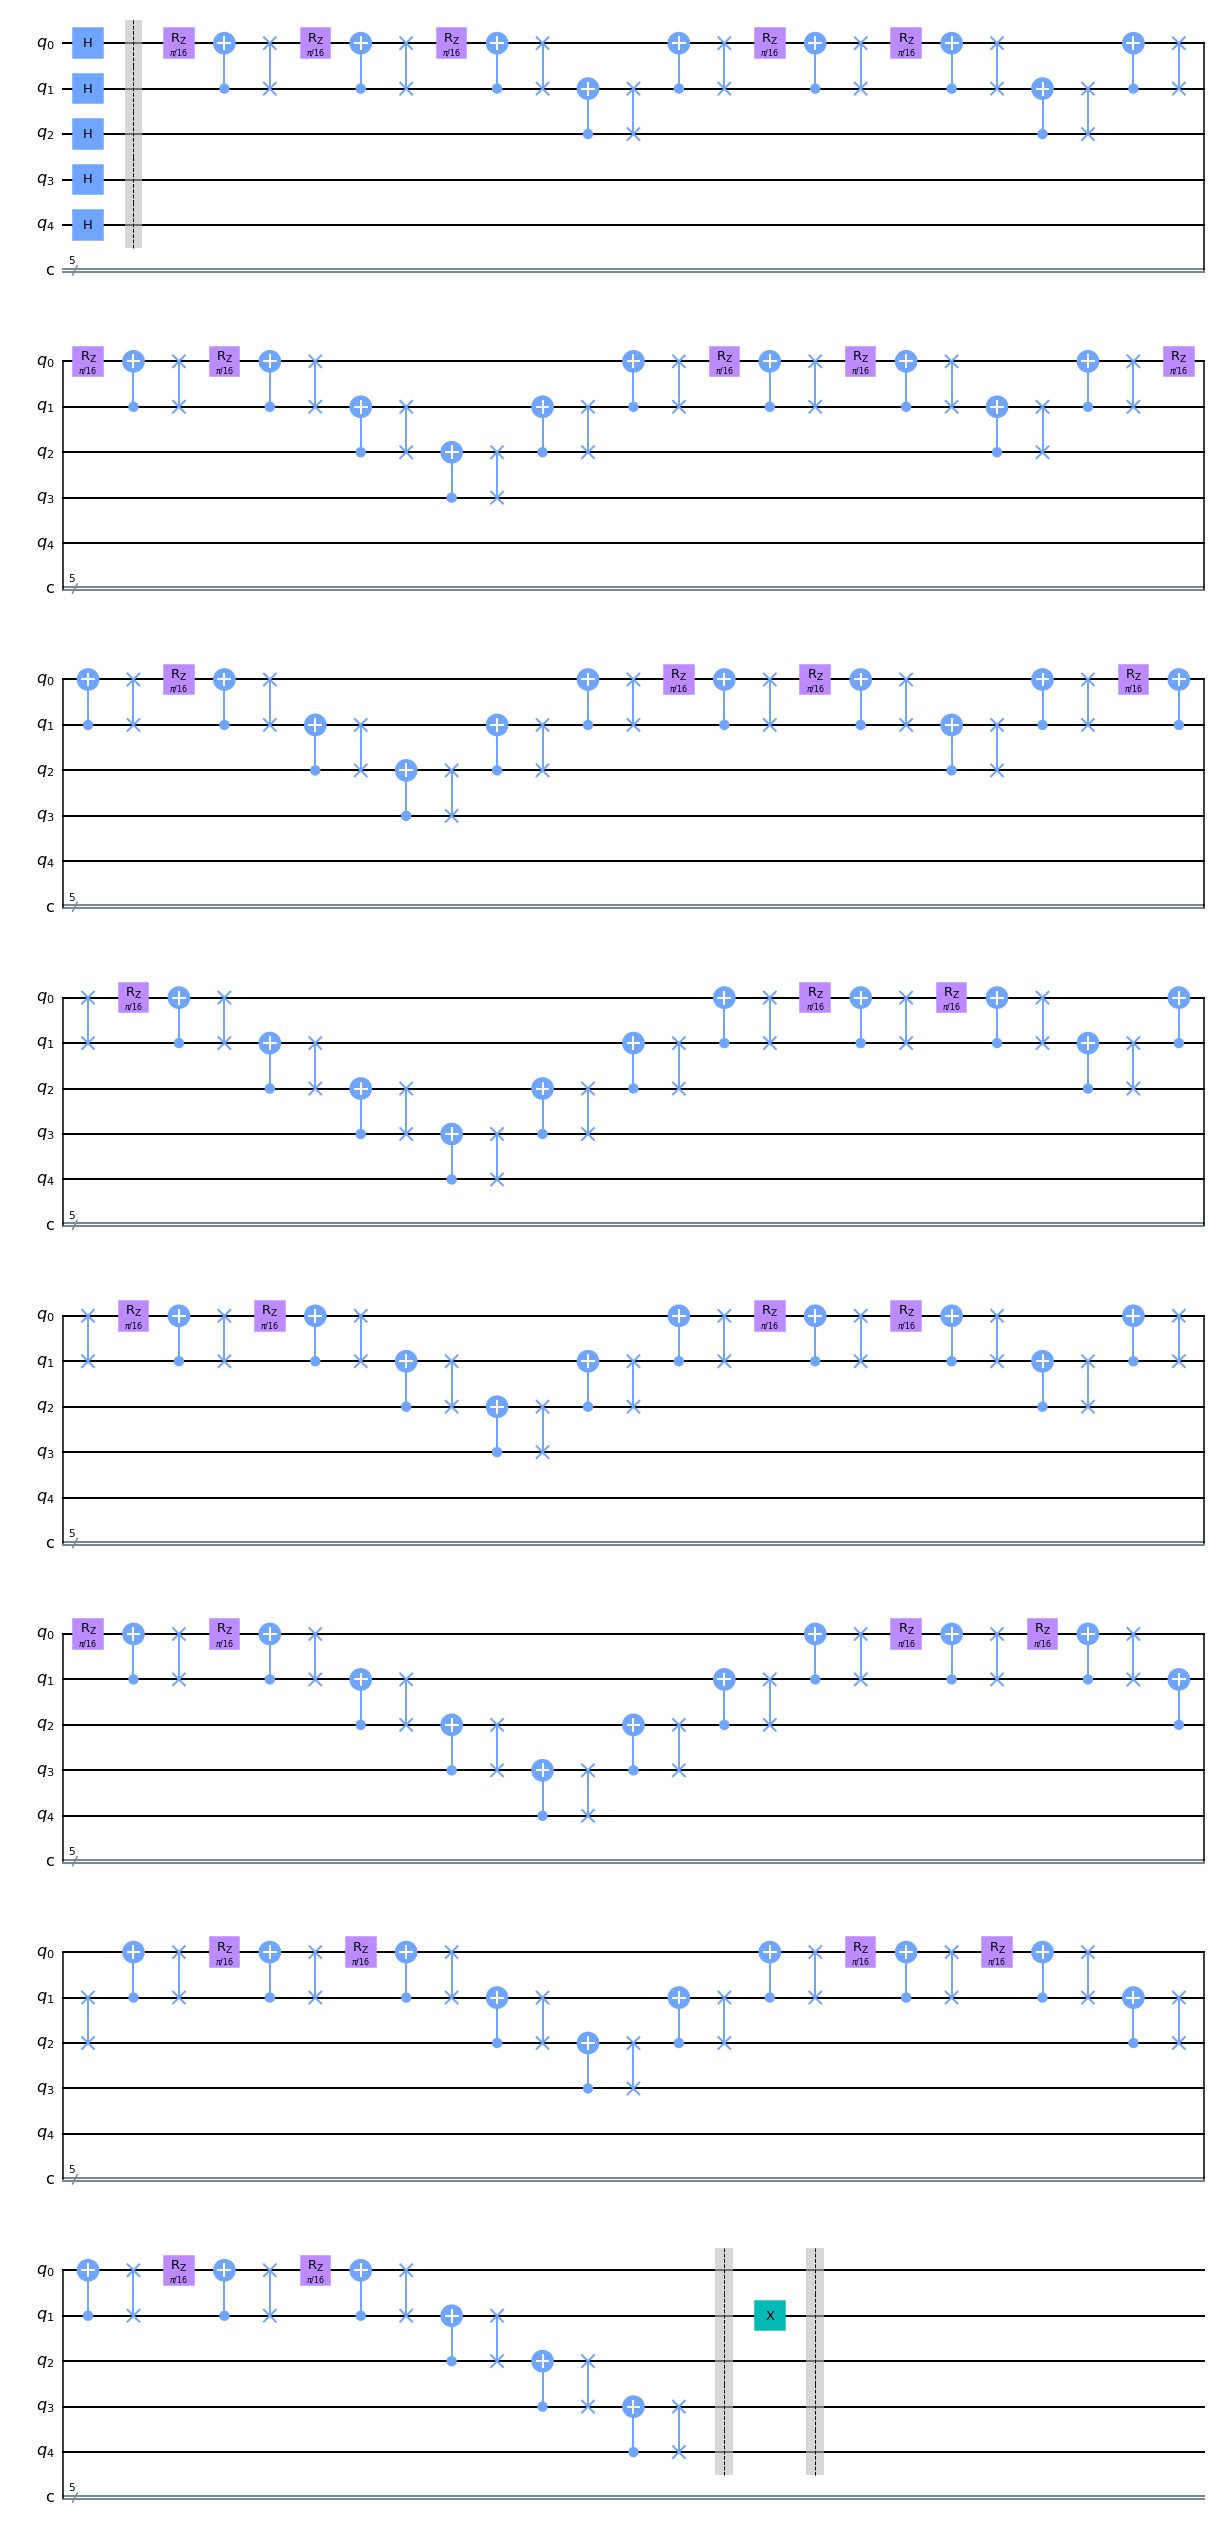

In [6]:
# Apply x gates to the 0 qubits in the string so that the output matches the entered string.

# If statements to determine where x gates will be placed
if bit[-1]=='0':
    qc.x(0)
if bit[-2]=='0':
    qc.x(1)
if bit[-3]=='0':
    qc.x(2)
if bit[-4]=='0':
    qc.x(3)
    
# Barrier
qc.barrier(range(0,n))

# Display the circuit
display(qc.draw())

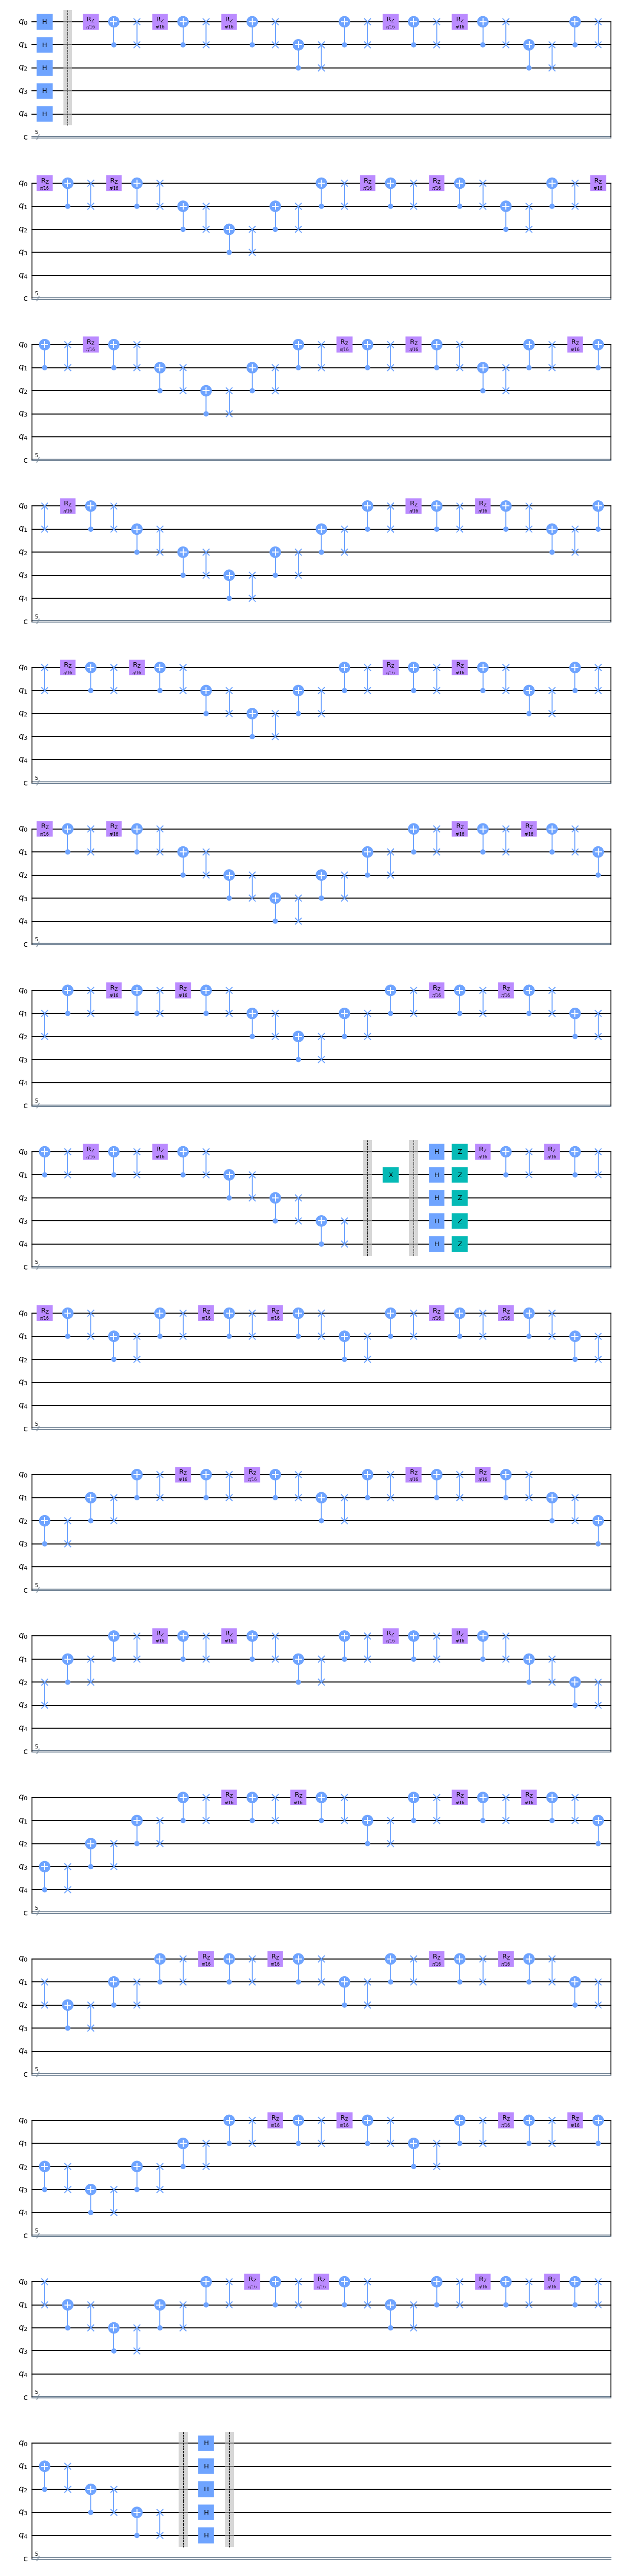

In [7]:
# Implement the Diffuser (H gate at each qubit, z gate at each qubit, z gate with n-1 controls, H gate at each qubit)

# H gate at each qubit
qc.h(range(0,n))

# Z gate at each qubit
qc.z(range(0,n))

# Z gate with n-1 controls
mqcz(qc,n)

# Barrier
qc.barrier(range(0,n))

# H gate at each qubit
qc.h(range(0,n))

# Barrier
qc.barrier(range(0,n))

# Display the circuit
display(qc.draw())

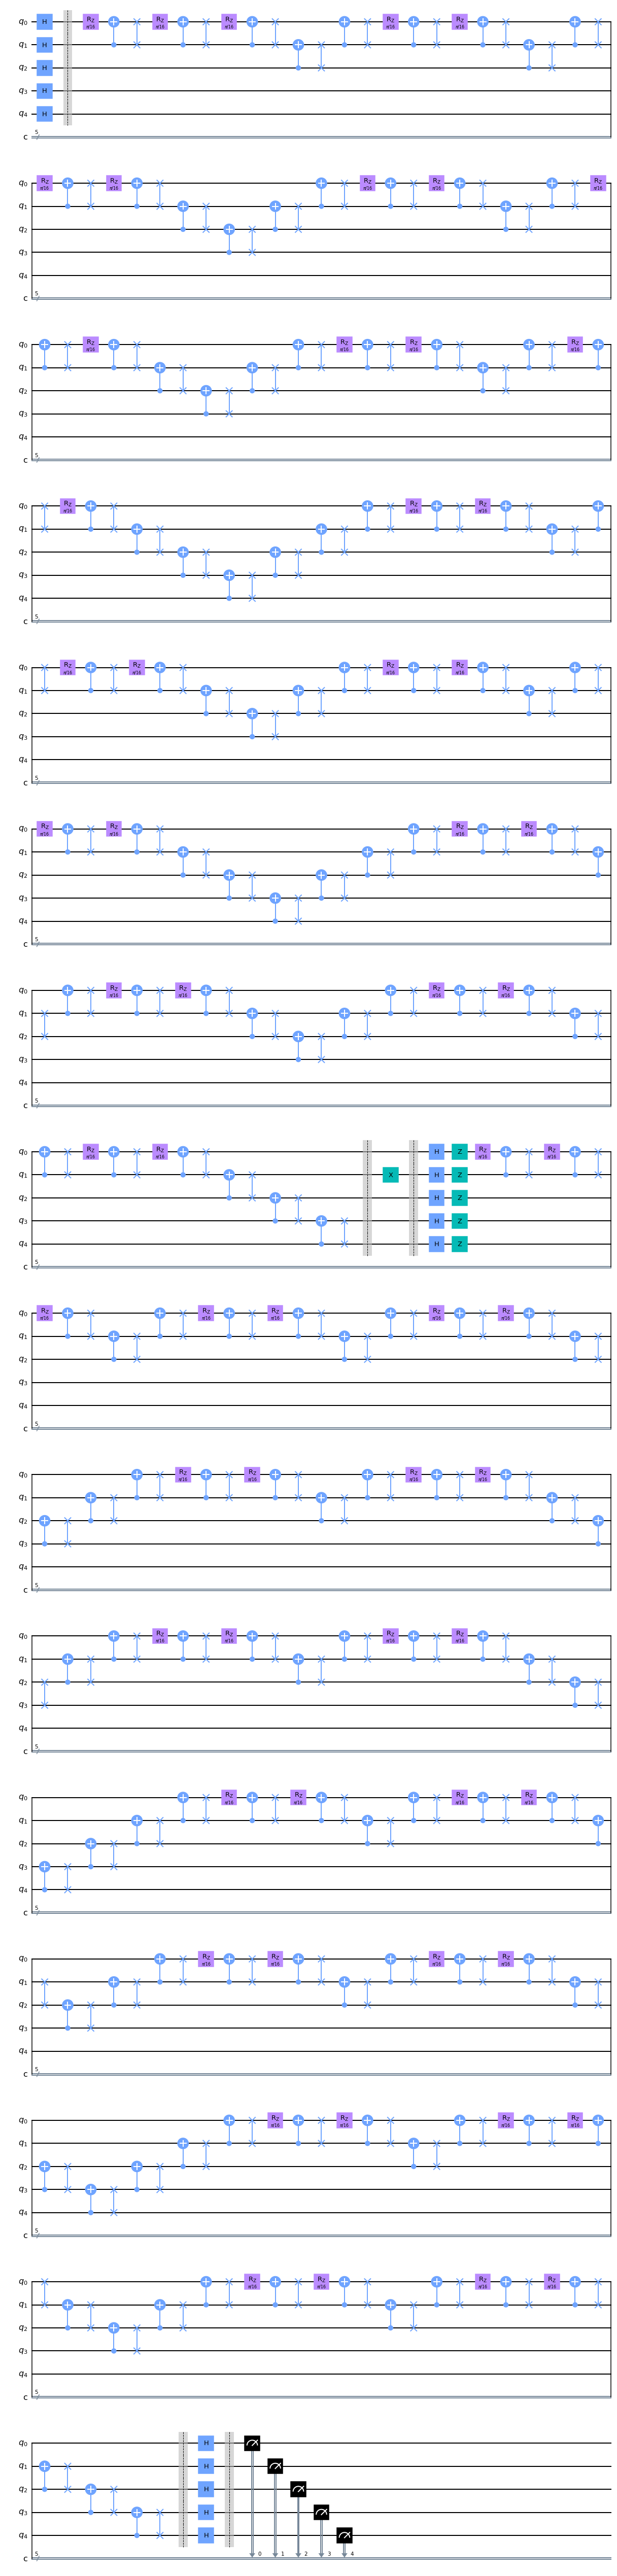

In [8]:
# Add measures to the circuit
qc.measure(range(0,n),range(0,n))

# Display the circuit
display(qc.draw())

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


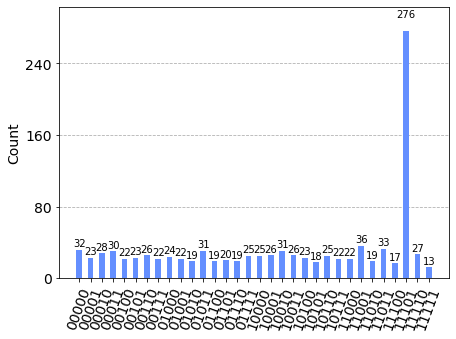

In [9]:
#Simulate the circuit and plot the results

# Simulate the circuit
sim = Aer.get_backend('aer_simulator')
job = assemble(qc)
result = sim.run(job).result()
counts = result.get_counts()

# plot the results
plot_histogram(counts)